In [600]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from numpy import where
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [601]:
df = pd.read_csv('dataset/data_kelulusan.csv')

In [602]:
df.head()

,Tahun,JK,prodi,Usia,IP1,AK1,IP2,AK2,IP3,AK3,IP4,AK4,IP5,AK5,IP6,AK6,Tepat
0,2017,L,PAI,21,3.43,215.0,3.50,207.0,3.52,110.0,3.08,162.0,3.64,155.0,3.58,255.0,1
1,2017,L,PAI,23,3.45,170.0,3.65,210.0,3.63,90.0,3.54,171.0,3.75,210.0,3.77,233.0,1
2,2017,L,PAI,23,3.45,165.0,3.53,220.0,3.42,70.0,2.19,170.0,3.55,121.0,3.17,230.0,1
3,2017,L,PAI,23,3.18,135.0,3.40,210.0,3.38,90.0,2.27,163.0,3.32,155.0,3.33,180.0,1
4,2017,L,PAI,24,3.30,151.0,3.43,206.0,3.50,90.0,2.83,164.0,3.52,196.0,3.58,NaN,1


In [603]:
data_isi = df.fillna(method="ffill")

In [604]:
y = data_isi['Tepat']
X = data_isi.drop(df.columns[0:3], axis=1)



scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

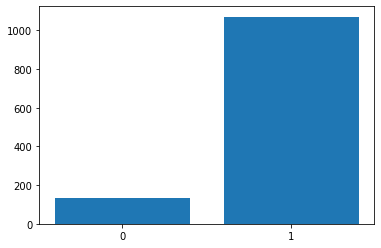

In [605]:
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.5, random_state=2, stratify=y) 

In [607]:
model = svm.OneClassSVM(kernel='linear', gamma='scale', nu=0.1)
X_train = X_train[y_train==1]
model.fit(X_train)

OneClassSVM(kernel='linear', nu=0.1)

In [608]:
y_pred = model.predict(X_test)
y_test[y_test==1] = 1
y_test[y_test==0] = -1
# y_pred


In [609]:
score = f1_score(y_test, y_pred, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.634


In [610]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.47      0.97      0.63        67
           1       1.00      0.86      0.92       535

    accuracy                           0.88       602
   macro avg       0.73      0.92      0.78       602
weighted avg       0.94      0.88      0.89       602

